In [1]:
import healpy as hp, numpy as np, prjlib, curvedsky, pickle, plottools as pl
from matplotlib.pyplot import *

In [22]:
pla = prjlib.analysis_init(t='la',freq='145',ntype='base_roll50')
psa = prjlib.analysis_init(t='sa',freq='145',ntype='base_roll50')
Tcmb = 2.72e6
v = 1e-6

In [3]:
Wla, wnla = prjlib.window(pla.telescope,ascale=pla.ascale)
Mla = Wla/(Wla+1e-30)
Wsa, wnsa = prjlib.window(psa.telescope,ascale=pla.ascale)
Msa, __ = prjlib.window(psa.telescope,ascale=0.)

/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 512
  warnings.warn("NSIDE = {0:d}".format(nside))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


In [14]:
Hla = prjlib.hitmap('la',pla.nside)
Hsa = prjlib.hitmap('sa',psa.nside)

/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))


In [23]:
nmap_la = hp.fitsfunc.read_map(pla.fcmb.nois[1],field=1,verbose=False)/Tcmb
smap_la = hp.fitsfunc.read_map(pla.fcmb.lcdm[1],field=1,verbose=False)/Tcmb

In [24]:
nmap_sa = hp.fitsfunc.read_map(psa.fcmb.nois[1],field=1,verbose=False)/Tcmb
smap_sa = hp.fitsfunc.read_map(psa.fcmb.lcdm[1],field=1,verbose=False)/Tcmb

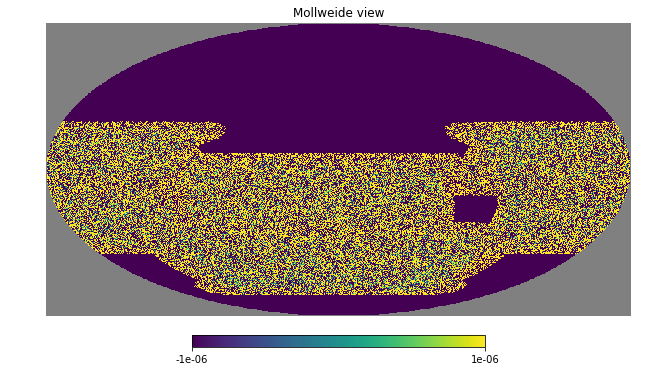

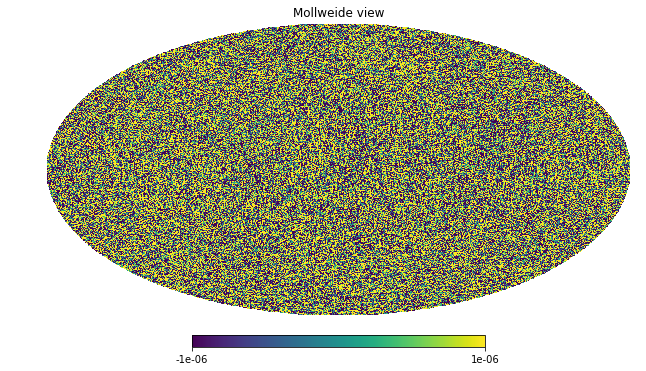

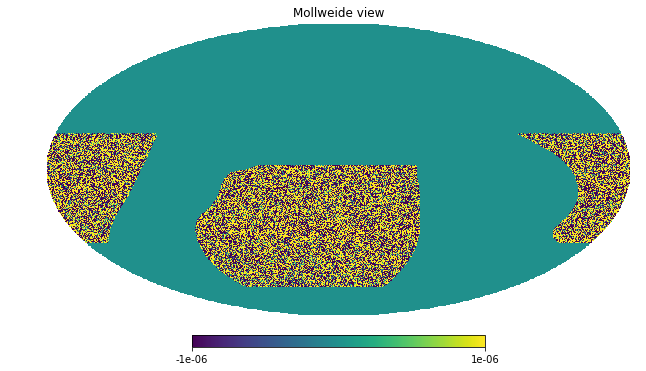

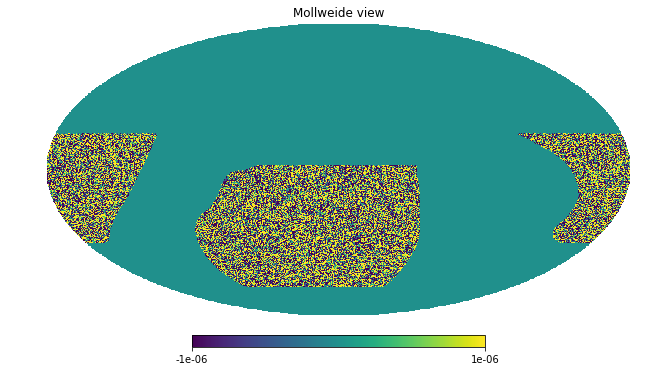

In [25]:
hp.mollview(nmap_la,min=-v,max=v)
hp.mollview(smap_la,min=-v,max=v)
hp.mollview(Mla*nmap_la,min=-v,max=v)
hp.mollview(Mla*smap_la,min=-v,max=v)

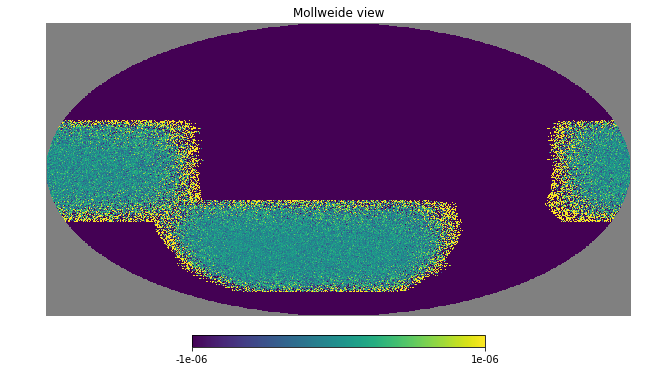

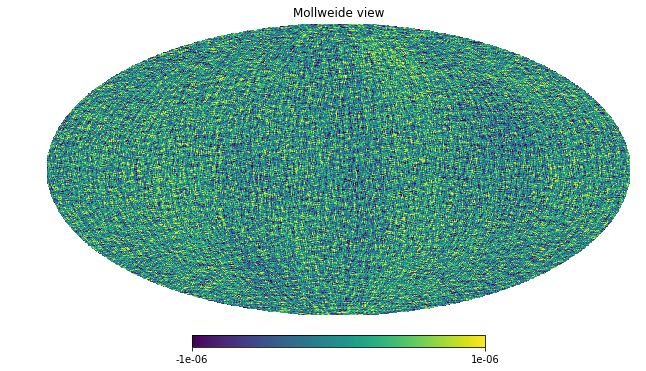

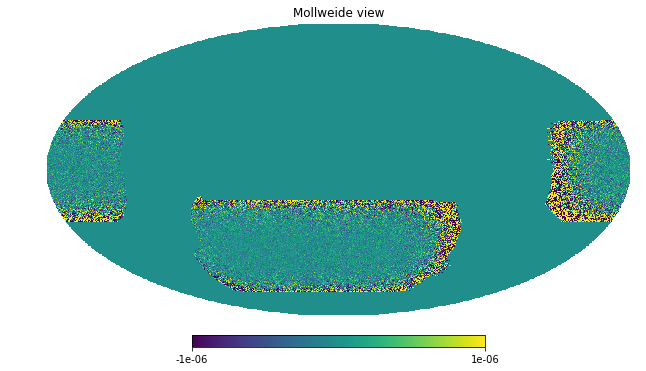

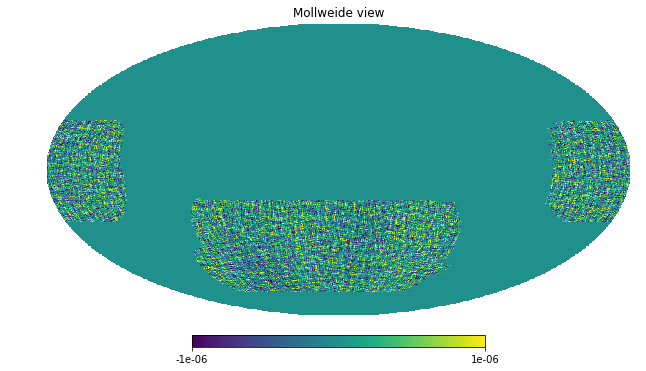

In [26]:
hp.mollview(nmap_sa,min=-v,max=v)
hp.mollview(smap_sa,min=-v,max=v)
hp.mollview(Msa*nmap_sa,min=-v,max=v)
hp.mollview(Msa*smap_sa,min=-v,max=v)

In [29]:
mapw = hp.ud_grade(Hla*(smap_la+nmap_la),psa.nside)/10.**2 + Hsa*(smap_sa+nmap_sa)/3.3**2

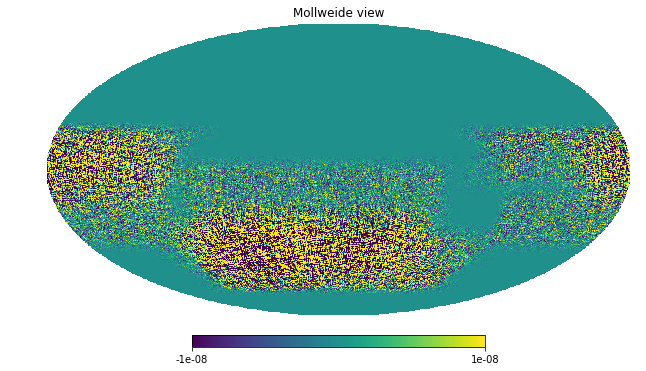

In [30]:
hp.mollview(mapw,min=-v*.01,max=v*.01)